In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [11]:
# Load the dataset
file_path = (r'C:\Users\divaa\OneDrive\Desktop\pri\Bliend\Bliend dataset\marketing_campaign_dataset.csv')  
data = pd.read_csv(file_path)

# Display the first few rows
print(data.head())


   Campaign_ID              Company Campaign_Type Target_Audience Duration  \
0            1  Innovate Industries         Email       Men 18-24  30 days   
1            2       NexGen Systems         Email     Women 35-44  60 days   
2            3    Alpha Innovations    Influencer       Men 25-34  30 days   
3            4   DataTech Solutions       Display        All Ages  60 days   
4            5       NexGen Systems         Email       Men 25-34  15 days   

  Channel_Used  Conversion_Rate Acquisition_Cost   ROI     Location  Language  \
0   Google Ads             0.04       $16,174.00  6.29      Chicago   Spanish   
1   Google Ads             0.12       $11,566.00  5.61     New York    German   
2      YouTube             0.07       $10,200.00  7.18  Los Angeles    French   
3      YouTube             0.11       $12,724.00  5.55        Miami  Mandarin   
4      YouTube             0.05       $16,452.00  6.50  Los Angeles  Mandarin   

   Clicks  Impressions  Engagement_Score    

In [12]:
# Convert Date to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Check for missing values
print("Missing values per column:\n", data.isnull().sum())



Missing values per column:
 Campaign_ID         0
Company             0
Campaign_Type       0
Target_Audience     0
Duration            0
Channel_Used        0
Conversion_Rate     0
Acquisition_Cost    0
ROI                 0
Location            0
Language            0
Clicks              0
Impressions         0
Engagement_Score    0
Customer_Segment    0
Date                0
dtype: int64


In [14]:
# General information and statistics
data.info()
data.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Campaign_ID       200000 non-null  int64         
 1   Company           200000 non-null  object        
 2   Campaign_Type     200000 non-null  object        
 3   Target_Audience   200000 non-null  object        
 4   Duration          200000 non-null  object        
 5   Channel_Used      200000 non-null  object        
 6   Conversion_Rate   200000 non-null  float64       
 7   Acquisition_Cost  200000 non-null  object        
 8   ROI               200000 non-null  float64       
 9   Location          200000 non-null  object        
 10  Language          200000 non-null  object        
 11  Clicks            200000 non-null  int64         
 12  Impressions       200000 non-null  int64         
 13  Engagement_Score  200000 non-null  int64         
 14  Cust

,Campaign_ID,Conversion_Rate,ROI,Clicks,Impressions,Engagement_Score,Date
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000
mean,100000.500000,0.080070,5.002438,549.772030,5507.301520,5.494710,2021-07-01 23:35:09.600000
min,1.000000,0.010000,2.000000,100.000000,1000.000000,1.000000,2021-01-01 00:00:00
25%,50000.750000,0.050000,3.500000,325.000000,3266.000000,3.000000,2021-04-02 00:00:00
50%,100000.500000,0.080000,5.010000,550.000000,5517.500000,5.000000,2021-07-02 00:00:00
75%,150000.250000,0.120000,6.510000,775.000000,7753.000000,8.000000,2021-10-01 00:00:00
max,200000.000000,0.150000,8.000000,1000.000000,10000.000000,10.000000,2021-12-31 00:00:00
std,57735.171256,0.040602,1.734488,260.019056,2596.864286,2.872581,NaN


In [17]:
# Check unique campaign types and target audiences
print("Unique Campaign Types:", data['Campaign_Type'].unique())
print("Unique Target Audiences:", data['Target_Audience'].unique())


Unique Campaign Types: ['Email' 'Influencer' 'Display' 'Search' 'Social Media']
Unique Target Audiences: ['Men 18-24' 'Women 35-44' 'Men 25-34' 'All Ages' 'Women 25-34']


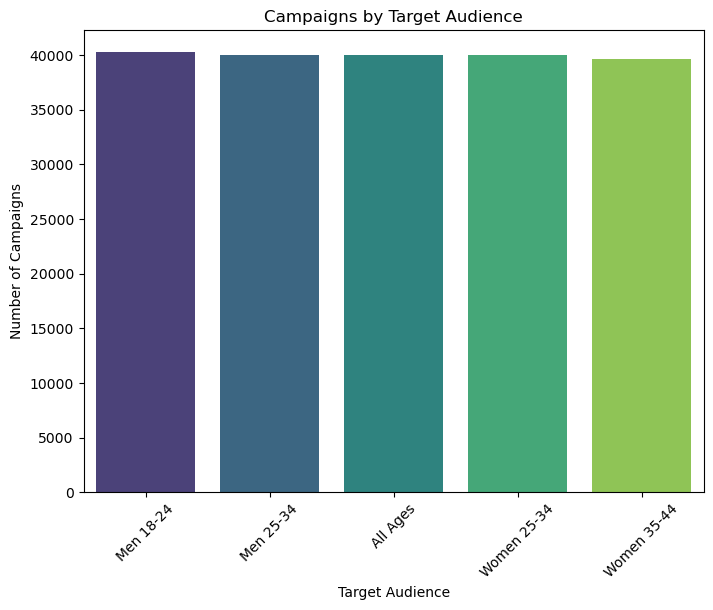

In [19]:
# Count campaigns for each target audience
audience_distribution = data['Target_Audience'].value_counts()

# Plot audience distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=audience_distribution.index, y=audience_distribution.values, hue=audience_distribution.index, palette='viridis')
plt.title('Campaigns by Target Audience')
plt.xticks(rotation=45)
plt.xlabel('Target Audience')
plt.ylabel('Number of Campaigns')
plt.show()


In [20]:
# Count campaigns for each target audience
audience_distribution = data['Target_Audience'].value_counts()
audience_distribution

Target_Audience
Men 18-24      40258
Men 25-34      40023
All Ages       40019
Women 25-34    40013
Women 35-44    39687
Name: count, dtype: int64

EDA

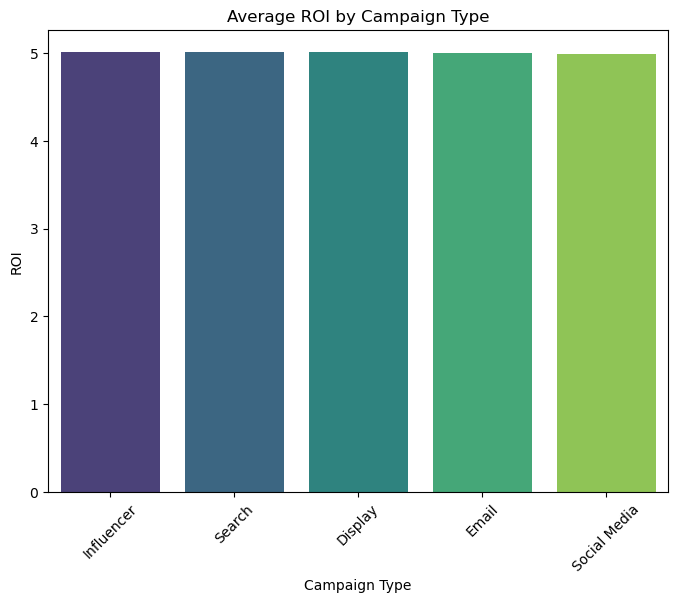

In [24]:
# Average ROI by Campaign Type
roi_by_campaign_type = data.groupby('Campaign_Type')['ROI'].mean().sort_values(ascending=False)

# Plot ROI by Campaign Type
plt.figure(figsize=(8, 6))
sns.barplot(x=roi_by_campaign_type.index, y=roi_by_campaign_type.values, hue=roi_by_campaign_type.index, palette='viridis')
plt.title('Average ROI by Campaign Type')
plt.xlabel('Campaign Type')
plt.ylabel('ROI')
plt.xticks(rotation=45)
plt.show()


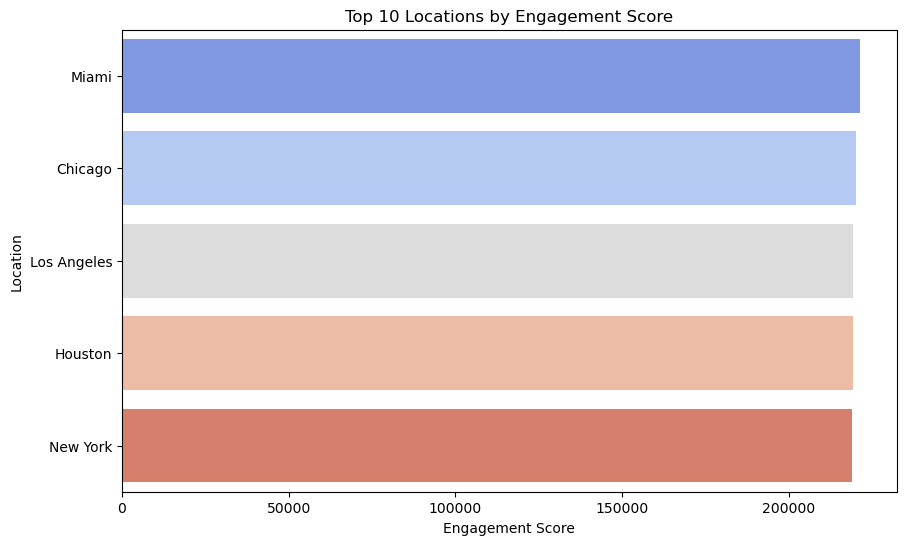

In [26]:
# Sum Engagement Score by Location
engagement_by_location = data.groupby('Location')['Engagement_Score'].sum().sort_values(ascending=False).head(10)

# Plot top 10 locations with hue set to 'y'
plt.figure(figsize=(10, 6))
sns.barplot(x=engagement_by_location.values, y=engagement_by_location.index, hue=engagement_by_location.index, palette='coolwarm')
plt.title('Top 10 Locations by Engagement Score')  # Updated title to reflect top 10
plt.xlabel('Engagement Score')
plt.ylabel('Location')
plt.show()


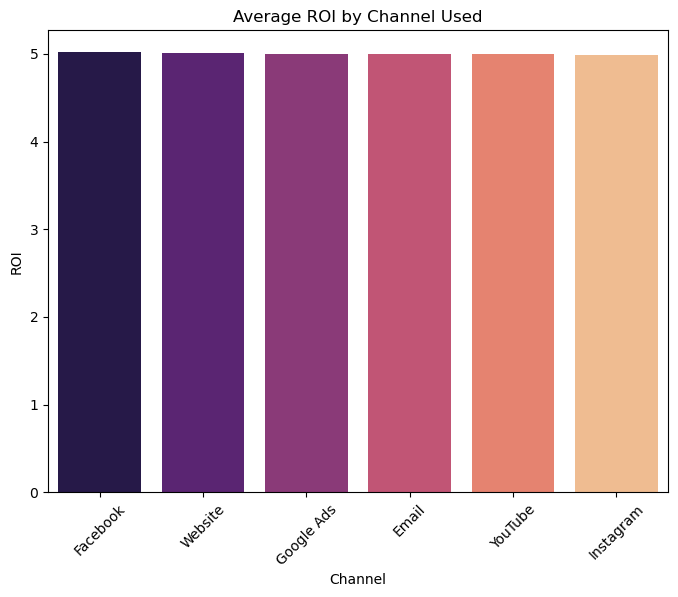

In [28]:
# Average ROI by Channel Used
roi_by_channel = data.groupby('Channel_Used')['ROI'].mean().sort_values(ascending=False)

# Plot ROI by Channel with hue set to 'x'
plt.figure(figsize=(8, 6))
sns.barplot(x=roi_by_channel.index, y=roi_by_channel.values, hue=roi_by_channel.index, palette='magma')
plt.title('Average ROI by Channel Used')
plt.xlabel('Channel')
plt.ylabel('ROI')
plt.xticks(rotation=45)
plt.show()


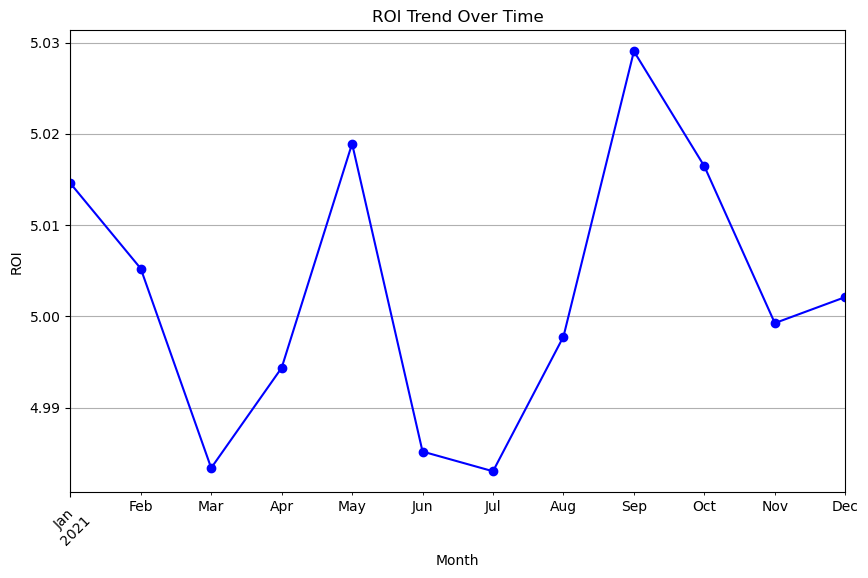

In [30]:
# Group by Month to calculate average ROI
data['Month'] = data['Date'].dt.to_period('M')
roi_trend = data.groupby('Month')['ROI'].mean()

# Plot ROI trend
plt.figure(figsize=(10, 6))
roi_trend.plot(marker='o', color='blue')
plt.title('ROI Trend Over Time')
plt.xlabel('Month')
plt.ylabel('ROI')
plt.xticks(rotation=45)
plt.grid()
plt.show()


CTR for every month

In [33]:
# Aggregate clicks and impressions by month
clicks_impressions = data.groupby('Month')[['Clicks', 'Impressions']].sum()
# Step 2: Calculate CTR for each month
clicks_impressions['CTR (%)'] = (clicks_impressions['Clicks'] / clicks_impressions['Impressions']) * 100

# Display the result
print(clicks_impressions)


          Clicks  Impressions    CTR (%)
Month                                   
2021-01  9349618     92956072  10.058104
2021-02  8433037     84493850   9.980652
2021-03  9367374     93804488   9.986062
2021-04  8992709     90677348   9.917261
2021-05  9335696     93384968   9.997001
2021-06  9046697     91119478   9.928390
2021-07  9347146     93060793  10.044129
2021-08  9308212     93801223   9.923338
2021-09  9069330     90658302  10.003860
2021-10  9384834     93264009  10.062653
2021-11  9029761     90734678   9.951830
2021-12  9289992     93505095   9.935279


In [35]:
import pandas as pd

# Example: Calculate correlation between numeric columns
numeric_cols = ['Conversion_Rate', 'Acquisition_Cost', 'ROI', 'Clicks', 'Impressions', 'Engagement_Score']

# Correlation matrix
correlation_matrix = data[numeric_cols].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Save the correlation matrix to a CSV if needed
correlation_matrix.to_csv("correlation_matrix.csv")


ValueError: could not convert string to float: '$16,174.00'

In [ ]:

# Top campaigns based on engagement score
top_campaigns = data.sort_values('Engagement_Score', ascending=False).head(10)

# Display top campaigns
print("Top 10 Campaigns by Engagement Score:")
print(top_campaigns[['Campaign_ID', 'Company', 'Engagement_Score', 'ROI']])


In [ ]:
highest_conversion = data.groupby(['Company', 'Campaign_ID'])['Conversion_Rate'].max().reset_index()
highest_conversion_sorted = highest_conversion.sort_values(by='Conversion_Rate', ascending=False)
print(highest_conversion_sorted.head())  # Display the top companies with their campaigns


In [ ]:
data['CTR'] = data['Clicks'] / data['Impressions']
ctr_by_segment = data.groupby('Customer_Segment')['CTR'].mean().reset_index()
ctr_by_segment_sorted = ctr_by_segment.sort_values(by='CTR', ascending=False)
print(ctr_by_segment_sorted.head())


In [ ]:
roi_by_location = data.groupby('Location')['ROI'].mean().reset_index()
roi_by_location_sorted = roi_by_location.sort_values(by='ROI', ascending=False)
print(roi_by_location_sorted.head())


In [41]:
engagement_by_channel = data.groupby('Channel_Used')['Engagement_Score'].mean().reset_index()
engagement_by_channel_sorted = engagement_by_channel.sort_values(by='Engagement_Score', ascending=False)
print(engagement_by_channel_sorted.head())


  Channel_Used  Engagement_Score
4      Website          5.508903
1     Facebook          5.503702
2   Google Ads          5.494049
3    Instagram          5.489039
0        Email          5.487842


In [43]:
impressions_by_campaign = data.groupby('Campaign_Type')['Impressions'].sum().reset_index()
impressions_clicks_correlation = data[['Impressions', 'Clicks']].corr().iloc[0, 1]
print(impressions_by_campaign.sort_values(by='Impressions', ascending=False))
print(f"Correlation between Impressions and Clicks: {impressions_clicks_correlation}")


  Campaign_Type  Impressions
3        Search    221415139
2    Influencer    220769081
1         Email    220144927
0       Display    220074756
4  Social Media    219056401
Correlation between Impressions and Clicks: 3.306901393742096e-05


In [50]:
engagement_by_campaign_type = data.groupby('Campaign_Type')['Engagement_Score'].mean().reset_index()
engagement_by_campaign_type_sorted = engagement_by_campaign_type.sort_values(by='Engagement_Score', ascending=False)
print(engagement_by_campaign_type_sorted.head())


  Campaign_Type  Engagement_Score
0       Display          5.505889
1         Email          5.499624
4  Social Media          5.497878
3        Search          5.487138
2    Influencer          5.483134


In [52]:
import pandas as pd

# Assuming your dataset is already loaded into a DataFrame called 'data'

# Group by 'Target_Audience' and calculate the total Engagement_Score
engagement_by_audience = data.groupby('Target_Audience')['Engagement_Score'].sum()

# Display the result
print("Engagement Score by Target Audience:")
print(engagement_by_audience)

# Optional: If you want to calculate the average instead of the total
average_engagement_by_audience = data.groupby('Target_Audience')['Engagement_Score'].mean()

print("\nAverage Engagement Score by Target Audience:")
print(average_engagement_by_audience)

# Optionally, save the results to a CSV file
# engagement_by_audience.to_csv('engagement_by_audience.csv')
# average_engagement_by_audience.to_csv('average_engagement_by_audience.csv')


Engagement Score by Target Audience:
Target_Audience
All Ages       219588
Men 18-24      222026
Men 25-34      219804
Women 25-34    219781
Women 35-44    217743
Name: Engagement_Score, dtype: int64

Average Engagement Score by Target Audience:
Target_Audience
All Ages       5.487094
Men 18-24      5.515078
Men 25-34      5.491942
Women 25-34    5.492740
Women 35-44    5.486507
Name: Engagement_Score, dtype: float64


In [54]:
import pandas as pd

# Assuming the dataset is loaded into a DataFrame called 'data'

# Group by Target_Audience and calculate the mean of Engagement_Score and ROI
engagement_roi_by_audience = data.groupby('Target_Audience')[['Engagement_Score', 'ROI']].mean()

# Reset index to make it more readable
engagement_roi_by_audience = engagement_roi_by_audience.reset_index()

# Print the results
print("Engagement Score and ROI by Target Audience:\n")
print(engagement_roi_by_audience)

# Save to CSV for reference if needed
# engagement_roi_by_audience.to_csv('engagement_roi_by_target_audience.csv', index=False)


Engagement Score and ROI by Target Audience:

  Target_Audience  Engagement_Score       ROI
0        All Ages          5.487094  5.005174
1       Men 18-24          5.515078  4.982853
2       Men 25-34          5.491942  5.020627
3     Women 25-34          5.492740  4.997351
4     Women 35-44          5.486507  5.006330
